In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from numpy.linalg import eigh

In [4]:
rd=pd.read_csv("mcdonalds.csv")


In [5]:
rd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [6]:
rd.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
plt.figure(figsize=(20,7))
gender = ['Male','Female']
for i in gender:
        plt.scatter(x='healthy',y='Like',rd=rd[rd['Gender']==i],s=200,alpha=0.5,label=i)
plt.legend()
plt.xlabel("healthy")
plt.ylabel("Like")
plt.show()

In [14]:
rd['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

In [15]:
rd['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [16]:
rd['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [43]:
rd['fast'].value_counts()

1    1308
0     145
Name: fast, dtype: int64

In [44]:
rd['cheap'].value_counts()

1    870
0    583
Name: cheap, dtype: int64

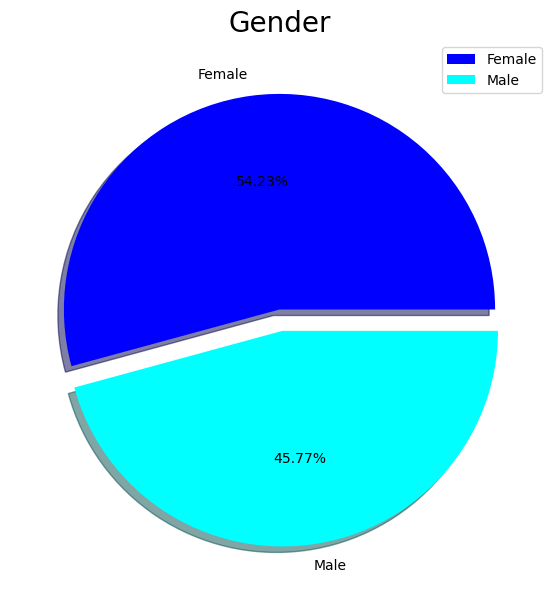

In [18]:
plt.figure(figsize = (7, 7))
plt.pie(rd['Gender'].value_counts(), colors = ['b', 'cyan'], explode = [0, 0.1], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Age distribution')

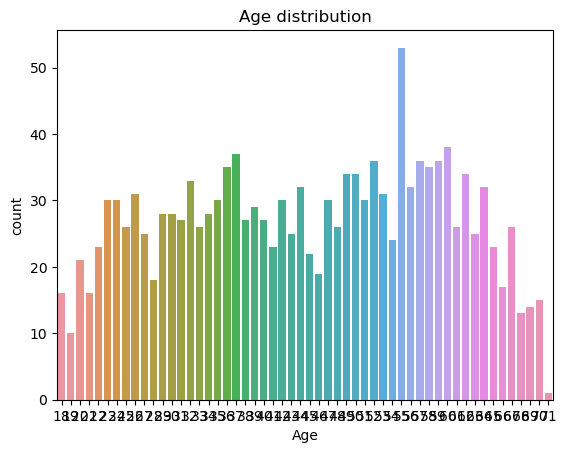

In [20]:
sns.countplot(x=rd['Age'],data=rd)
plt.title('Age distribution')

In [ ]:
pca=PCA(n_components=11)
principal_components=pca.fit_transform()
sns.scatterplot(principal_components,x=principal_components[:,0],y=principal_components[:1])

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def label(rd,column):
    rd[column]=le.fit_transform(rd[column])
    return rd 
tag= ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
for category in tag:
    rd=label(rd,category)
rd.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

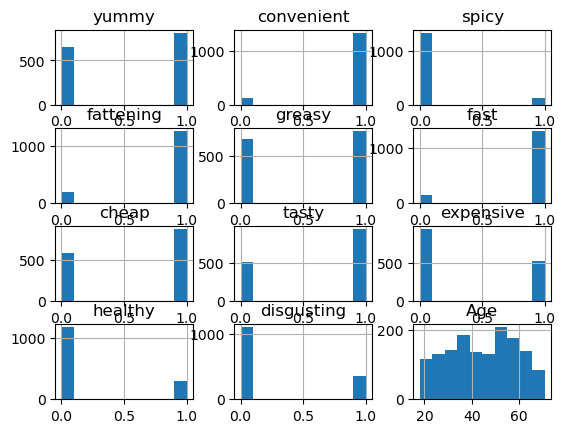

In [31]:

rd.hist()


In [39]:
rd_processed= rd.drop(labels=['Like','Age','VisitFrequency','Gender'],axis=1)
rd_labelled= rd_processed.apply(LabelEncoder().fit_transform)
rd_labelled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [40]:
pca_data=preprocessing.scale(rd_labelled)
pca=PCA(n_components=11)
transformed_data=pca.fit_transform(rd_labelled)
transformed_data

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

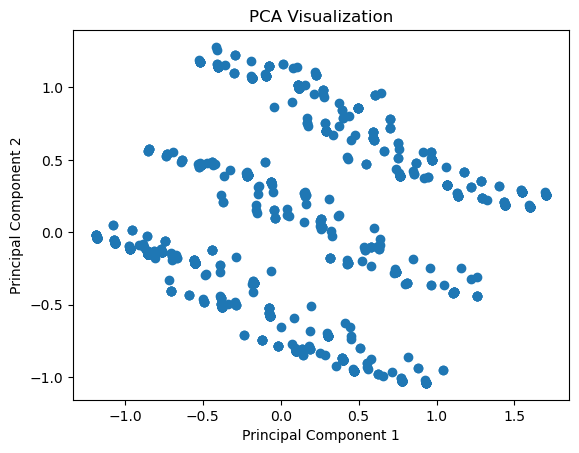

In [42]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()